# ZINDI AIR QUALITY PREDICTION CHALLENGE

## OKWUAZU IFEAKACHUKWU

In [1]:
import os 
os.environ['PYTHONHASHSEED']=str(1)

In [2]:
import tensorflow as tf 
import tensorflow.keras as keras 
import tensorflow.keras.layers 

In [3]:
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(1)
    tf.random.set_seed(1)
    np.random.seed(1)
    random.seed(1)

In [4]:
import random 
import warnings
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.regularizers import l1

In [6]:
Train= pd.read_csv('C:\\Users\\Okwua\\Train_AQI.csv')
Test= pd.read_csv('C:\\Users\\Okwua\\Test_AQI.csv')

In [7]:
Test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [8]:
def drop_cols_na(Train, threshold):
  """Recieves dataframe(df) and threshold as arguements and drops columns based on the threshold percentage of NANs"""
  threshold= len(Train) * 0.8 #specifying threshold percentage 
  Train=Train.dropna(axis=1, thresh=threshold)  #dropping columns with 50% NANs
  return Train

In [9]:
#calling the function
Train = drop_cols_na(Train,0.8)
Test = drop_cols_na(Test,0.8)


In [10]:
print((Train.shape,Test.shape))

((30557, 57), (16136, 52))


In [11]:
Train.drop(['Place_ID X Date','Place_ID','target_min','target_max','target_variance','target_count'], axis=1, inplace=True)

Test.drop(['Place_ID X Date','Place_ID'], axis=1, inplace=True)

In [12]:
Train.fillna(Train.mean(), inplace=True)
Test.fillna(Test.mean(), inplace=True)

In [13]:
Train['Date']= pd.to_datetime(Train['Date'], dayfirst=True)

#
Train['year']=Train['Date'].dt.year
Train['Month']=Train['Date'].dt.month
Train['Day']=Train['Date'].dt.day


Train.drop(['Date'],axis=1, inplace=True)

In [14]:
Test['Date']= pd.to_datetime(Test['Date'], dayfirst=True)

#
Test['year']=Test['Date'].dt.year
Test['Month']=Test['Date'].dt.month
Test['Day']=Test['Date'].dt.day


Test.drop(['Date'],axis=1, inplace=True)

In [15]:
# move tagret column to last position 
new_cols = [col for col in Train.columns if col != 'target'] + ['target']
Train= Train[new_cols]


In [16]:
X=Train.iloc[:,:-1] ## independent features
y=Train.iloc[:,-1] ## dependent features

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances=feat_importances.nlargest(35).keys().to_list()


In [19]:
for item in feat_importances:
    Train_data_new =Train[feat_importances]
    Test_data_new =Test[feat_importances]

In [20]:
scaler_x=StandardScaler()
X_scaled=scaler_x.fit(Train_data_new)
X_scaled=scaler_x.transform(Train_data_new)



scaler_y=StandardScaler()
y=y.values.reshape(-1,1)
y_scaled=scaler_y.fit(y)
y_scaled=scaler_y.transform(y)

In [21]:
X_scaled.shape


(30557, 35)

In [22]:
y_scaled.shape

(30557, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25,random_state=0)

In [24]:
def create_model():
    reset_random_seeds()
    Ann_model = Sequential()

# The Input Layer :
    Ann_model.add(Dense(360, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu',kernel_regularizer=l1(0.01),bias_regularizer=l1(0.01)))

# The Hidden Layers :
    Ann_model.add(Dense(360,activation='relu'))
    Ann_model.add(Dropout(0.2))
    Ann_model.add(Dense(360,activation='relu'))
    Ann_model.add(Dropout(0.2))
    Ann_model.add(Dense(180,activation='relu'))
    Ann_model.add(Dropout(0.2))
    Ann_model.add(Dense(180,activation='relu'))
    Ann_model.add(Dense(90,activation='relu'))

# The Output Layer :
    Ann_model.add(Dense(1,activation='linear'))

# Compile the network :
    Ann_model.compile(loss='mse', optimizer='adagrad', metrics=['mean_squared_error'],)
    return Ann_model
 


In [25]:
from keras.wrappers.scikit_learn import KerasRegressor
Ann_model=KerasRegressor(build_fn=create_model)

In [26]:
from keras.callbacks import EarlyStopping

early_stopping=EarlyStopping()

In [27]:
model_history=Ann_model.fit(X_train, y_train,validation_data=(X_train,y_train),verbose=0, 
                            batch_size = 10, epochs = 500,callbacks=[early_stopping])



In [28]:
pred_test=Ann_model.predict(X_test)
pred_train=Ann_model.predict(X_train)

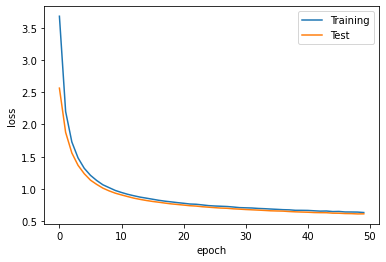

In [29]:
plt.plot(model_history.history['loss'], label='Training')
plt.plot(model_history.history['val_loss'], label='Test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

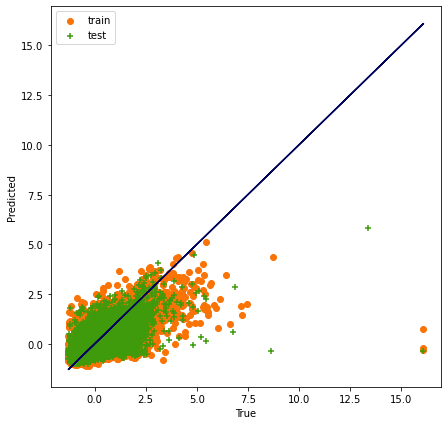

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(y_train,pred_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test,pred_test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train,y_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [31]:
from sklearn import metrics 
from sklearn.metrics import r2_score

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R_squared:'+ str(round(r2_score(y_test,pred_test),2)))

MAE: 0.48224576673554237
MSE: 0.5004080767332194
RMSE: 0.7073952761598139
R_squared:0.5


In [33]:
scaler_x=StandardScaler()
Test_new_scaled=scaler_x.fit(Test_data_new)
Test_new_scaled=scaler_x.transform(Test_data_new)


In [39]:
y_hat=Ann_model.predict(Test_new_scaled)

In [40]:
sub= pd.read_csv('C:\\Users\\Okwua\\SampleSubmission.csv')

In [42]:
y_hat = scaler_y.inverse_transform(y_hat)
print(y_hat)

[50.907104 47.54038  51.1478   ... 45.73564  48.92807  50.012844]


In [43]:
sub['target']=y_hat

In [44]:
sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,50.907104
1,0OS9LVX X 2020-01-03,47.540379
2,0OS9LVX X 2020-01-04,51.147800
3,0OS9LVX X 2020-01-05,37.041096
4,0OS9LVX X 2020-01-06,39.175957


In [45]:
sub.to_csv('Output.csv', index=False)